In [1]:
import pandas as pd
from matplotlib import pyplot as plt

import re
import os

In [2]:
def analyze_equil (file=None):
    table=pd.DataFrame()
    columns=[]
    values=[]
    t_index=0
    with open(file, 'r') as f:
        doc=[line for line in f.readlines()]

        start=[index for (index,p) in enumerate(doc) if 'Step           Time         Lambda' in p]
        finish=[index-1 for (index,p) in enumerate(doc) if 'Step           Time         Lambda' in p]
        finish.append(len(doc))

        interval=list(zip(start,finish[1:-1]))

        for i in interval:
            block = doc[i[0]:i[1]]


            arrange=[]
            for line in block:
                if 'Energies' not in line and 'Writing checkpoint' not in line and 'pme mesh/force' not in line and 'NOTE' not in line and 'performance loss' not in line:
                    line=line.strip()
                    line = re.split(r'\s{2,}', line)
                    if line!=['']:
                        arrange.append(line)

            for i,text in enumerate(arrange):
                if text==['Temperature Pressure (bar)', 'Constr. rmsd']:
                    arrange[i]=['Temperature', 'Pressure (bar)', 'Constr. rmsd']      

            for i,text in enumerate(arrange):
                if (i % 2) == 0:
                    columns+=text
                else:
                    values+=[float(i) for i in text] 

            for num in range(len(columns)):
                    table.loc[t_index,columns[num]]=values[num]

            t_index=t_index+1
    
        table.to_excel(file.replace('.log','.xlsx'))

    for col in table.columns:
        if col in ['Temperature','Pressure (bar)','Constr. rmsd','Potential','Total Energy','Kinetic En.']:

            plt.figure(figsize=(10,5))

            ax1=plt.subplot()
            plt.plot(table['Time'],table[col],color='k')

            plt.title(file,fontsize=20,weight='bold')
            plt.ylabel(col,fontsize=16,fontweight='bold')
            plt.xlabel('Time(ps)',fontsize=16,fontweight='bold')

            ax1.spines['left'].set_visible(False)
            ax1.spines['top'].set_visible(False)
            ax1.spines['right'].set_visible(False)

            plt.tick_params ('both',width=2,labelsize=12)
            plt.tight_layout()
            plt.savefig(file.replace('.log',('_'+col))+'.png',dpi=90,quality=95,format='png')

/mnt/c/Users/angel/Linux_programs/miniconda3/envs/Chem_3/lib/python3.7/site-packages/ipykernel_launcher.py:62: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later
/mnt/c/Users/angel/Linux_programs/miniconda3/envs/Chem_3/lib/python3.7/site-packages/ipykernel_launcher.py:62: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later
/mnt/c/Users/angel/Linux_programs/miniconda3/envs/Chem_3/lib/python3.7/site-packages/ipykernel_launcher.py:62: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later
/mnt/c/Users/angel/Linux_programs/miniconda3/envs/Chem_3/lib/python3.7/site-packages/ipykernel_launcher.py:62: MatplotlibDeprecationWarning: savefig() got

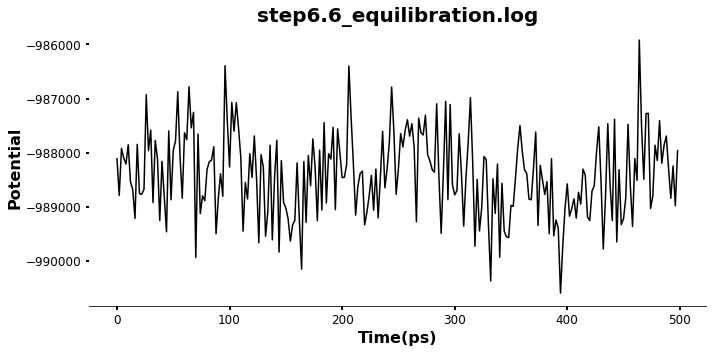

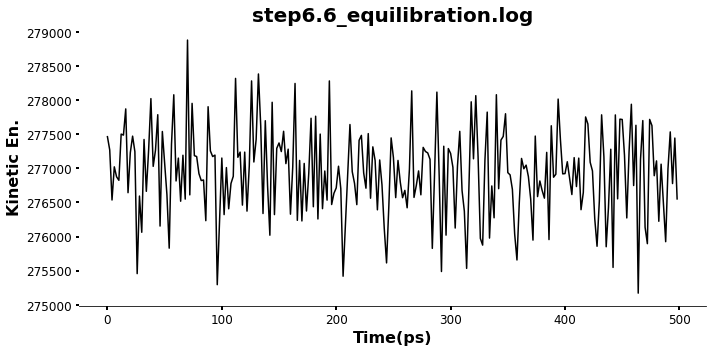

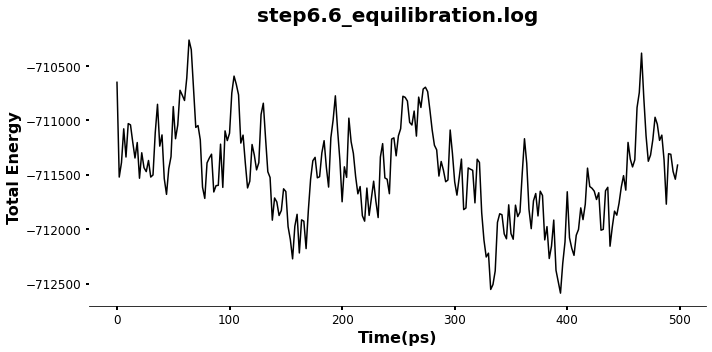

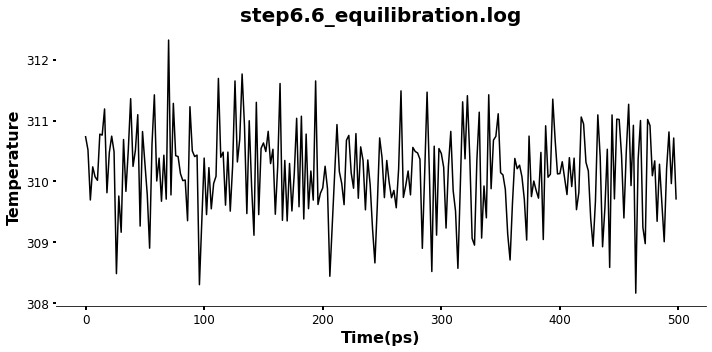

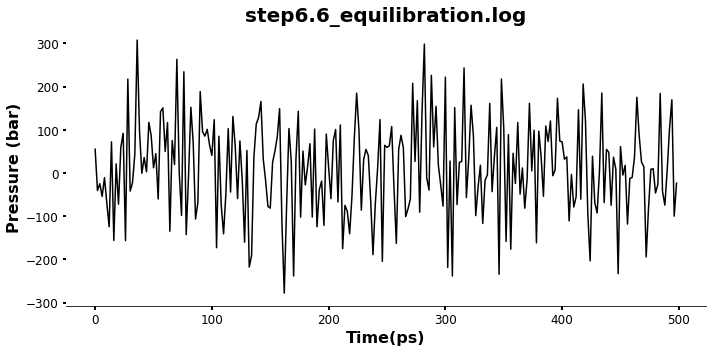

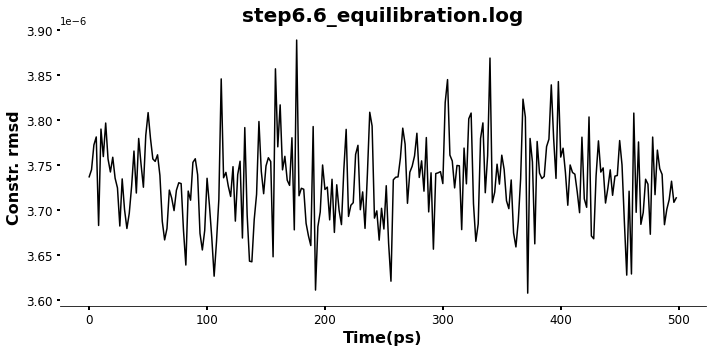

In [6]:
analyze_equil(file='step6.6_equilibration.log')